# Final Project: Breast Cancer Diagnostic Classification

## 1. **Main Objective of the Analysis**
**The primary objective of this analysis is to develop a classification model that can assist in the early detection and diagnosis of breast cancer, distinguishing between benign and malignant tumors based on diagnostic measurements from fine needle aspiration (FNA) biopsies.**

This analysis will focus on both prediction and interpretation, balancing accuracy with explainability.

#### Prediction Focus: 
We aim to develop a model that achieves high accuracy in classifying tumors, helping medical professionals make informed decisions quickly.


#### Interpretation Focus: 
Understanding the key features that contribute to the classification (e.g., cell radius, texture, perimeter) is essential for medical experts to trust and validate the model’s decisions.


#### Benefits to Stakeholders
This analysis can provide value to several key stakeholders:

1. **Healthcare Professionals (Doctors, Radiologists, Pathologists)**

   - Faster and more reliable diagnoses, supporting decision-making in clinical settings.
   - Identifying critical tumor characteristics that differentiate malignant and benign cases.

2. **Patients and Their Families**

   - Early and accurate detection improves survival rates by enabling timely treatment.
   - Reduces the likelihood of misdiagnosis, minimizing unnecessary anxiety or delays in treatment.

3. **Medical Researchers**

   - Helps in understanding the biological indicators of cancer development.
   - Can aid in the design of better diagnostic tools and screening methods.

4. **Healthcare Institutions & Policymakers**

   - Enhances efficiency by reducing the workload of manual evaluations.
   - Supports data-driven decisions in designing public health initiatives for cancer screening.
  
By building a model that is both accurate and interpretable, we aim to contribute to improving breast cancer diagnostics, ultimately leading to better patient outcomes and more effective clinical decision-making.

## 2. **Dataset Description and Summary of Attributes**  

The **Breast Cancer Wisconsin Diagnostic Dataset** is a publicly available dataset from the **UCI Machine Learning Repository**. It consists of **digitized biopsy images** of breast masses obtained through **fine needle aspiration (FNA)**. Each sample is labeled as **benign (non-cancerous)** or **malignant (cancerous)** based on diagnostic features extracted from the images.  

It can be downloaded ([HERE](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)) 

### **Summary of Attributes**  
The dataset contains **569 samples** with **30 numerical features** derived from **cell nuclei characteristics** in the biopsy images. The features are grouped into three main categories:  

1. **Radius, Texture, Perimeter, Area, and Smoothness**  
   - These describe the **size, shape, and surface properties** of the cell nuclei.  

2. **Compactness, Concavity, and Symmetry**  
   - These provide insights into the **irregularity and symmetry** of the nuclei.  

3. **Fractal Dimension and Other Geometric Measures**  
   - These help quantify **complexity and growth patterns** of the tumor cells.  

Additionally, each sample has a **diagnosis label**:  
- **Benign (B)** – Non-cancerous tumor.  
- **Malignant (M)** – Cancerous tumor.  

### **Objective of the Analysis**  
With this dataset, our primary goal is to **train and evaluate classification models** that can accurately differentiate between **benign and malignant tumors**. By analyzing the relationships between these attributes, we aim to:  
- Identify the **most important features** for diagnosis.  
- Compare multiple classification models to achieve **high accuracy** while maintaining **interpretability**.  
- Provide **insights for medical professionals** to enhance breast cancer screening.  

This study aims to contribute to **early and reliable breast cancer detection**, ultimately assisting **doctors and researchers** in improving diagnostic efficiency.

## 3. **Data Exploration, Cleaning, and Feature Engineering**  

### **Exploratory Data Analysis (EDA)**  
Before building predictive models, we conducted an **exploratory data analysis (EDA)** to understand the structure of the dataset and detect potential issues. Key findings include:  

- The dataset contains **569 samples** with **30 numerical features** plus the target variable (**diagnosis: malignant or benign**).  
- No missing values were detected in the dataset.  
- No features are highly correlated.  
- The target variable is slightly **imbalanced**, with **62.7% benign** cases and **37.3% malignant** cases, which may affect model performance.  

### **Data Cleaning Steps**  
- **Checked for missing values** – None found.  
- **Removed the "ID" column** – This column is irrelevant for classification.  
- **Converted categorical target variable (diagnosis)** (coming from the dataset, use a LabelEncoder if this is still Categorical)  into a numerical format:  
  - **Benign (B) → 0**  
  - **Malignant (M) → 1**  

### **Feature Engineering and Selection**  
- **Standardization**: Since the features have different scales, we applied **Standard Scaling** to ensure that all numerical values are on a similar scale, so that they have a mean of 0 and a standard deviation of 1, improving model convergence.  
- **Correlation Analysis**: No highly correlated features identified.  
- **Class Imbalance Handling** (performed on a later stage):  
  - Considered **oversampling** (SMOTE) or **undersampling** to balance the dataset.  
  - Evaluated performance on original vs. balanced data.  

### **Key Takeaways**  
- The dataset is **clean and well-structured**, requiring minimal preprocessing.  
- Some features exhibit **high correlation**, which may be addressed through feature selection.  
- **Scaling and encoding** were applied to ensure optimal model performance.  
- The **class imbalance** may require additional handling in the modeling phase to avoid biased predictions.  

These preprocessing steps ensure that our models can learn efficiently and provide reliable predictions for breast cancer classification.

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support
from xgboost import XGBClassifier
from matplotlib.pyplot import figure
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix

### **Exploratory Data Analysis (EDA)**  

In [6]:
# Load dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['diagnosis'] = data.target  # 1 = Malignant, 0 = Benign

In [7]:
# Display basic dataset info
print("Dataset Info:\n", df.info())
print("\nClass Distribution:\n", df['diagnosis'].value_counts(normalize=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

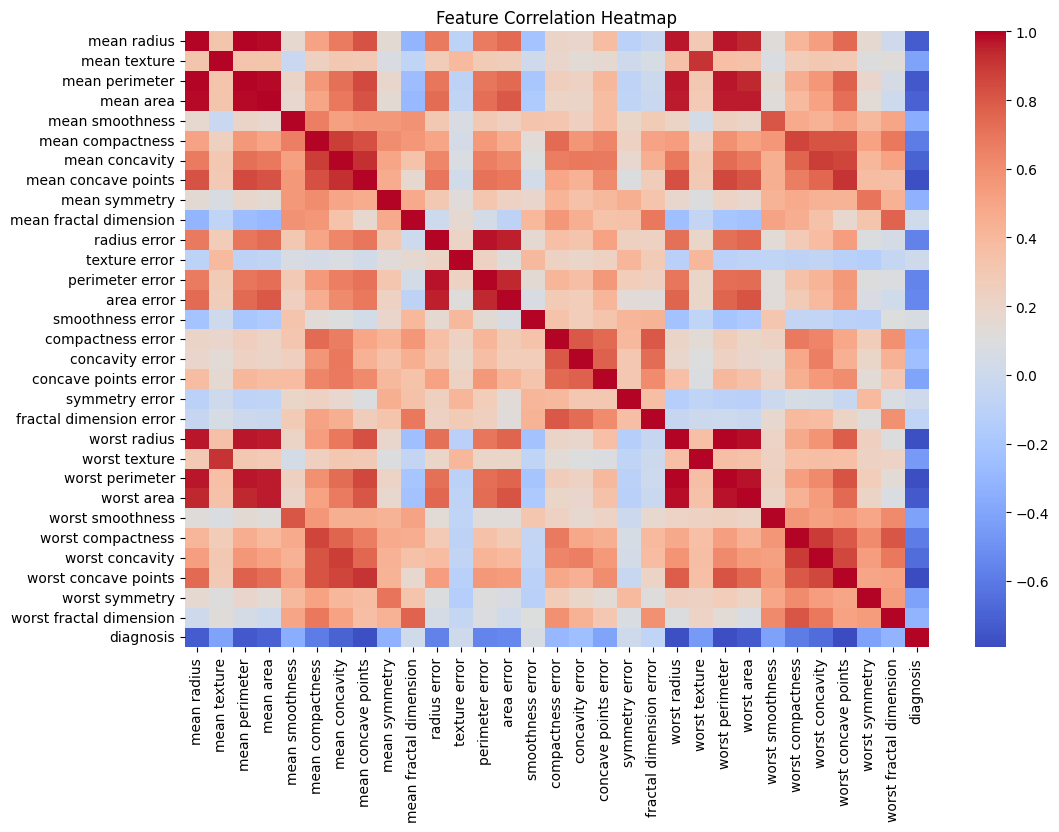

In [8]:
# Check feature correlation
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [9]:
# Identify highly correlated features (correlation > 0.9)
# Check for correlation between features and the target
correlations = df.corr()
sorted_correlations = correlations['diagnosis'].sort_values(ascending=False)
print(sorted_correlations)

# Print values that are greater than 0.9
print("Values greater than 0.9:")
print(sorted_correlations[sorted_correlations > 0.9])

diagnosis                  1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

### **Data Cleaning Steps**  

The column "ID" was already removed from the dataset. If is still here, use df.drop["ID"] to get rid of it

In [10]:
df.columns
# Drop here the ID column if present

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'diagnosis'],
      dtype='object')

No missing values found

In [11]:
#Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
diagnosis                  0
dtype: int64


We perform the transformation of the target variable 'diagnosis' to int type, as we will need it later to run the classifiers (although not completely needed here due to having natively the variable as integer type)

In [12]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'diagnosis' column
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

# Verify the transformation
print(df['diagnosis'].value_counts())

diagnosis
1    357
0    212
Name: count, dtype: int64


### **Feature Engineering and Selection**  

- **Standardization**: Since the features have different scales, we applied **Standard Scaling** to ensure that all numerical values are on a similar scale, so that they have a mean of 0 and a standard deviation of 1, improving model convergence. This will be performed in the next step, after the Train-Test split, to prevent data leakage. 
- **Correlation Analysis**: No highly correlated features identified (previously done) 
- **Class Imbalance Handling** (performed on a later stage):  
  - Considered **oversampling** (SMOTE) or **undersampling** to balance the dataset.  
  - Evaluated performance on original vs. balanced data.  

## 4. **Model Training and Performance Evaluation**
**Here is the training of different classifier models, including Logistic Regression, KNN, SVM, Decision Trees, Random Forest, Bagging, Boosting (Gradient Boosting), and Stacking, along with performance metrics (precision, accuracy, recall, and F1-score).**

#### Approach
**To evaluate model performance effectively, we followed these steps:**

1. Used the same train-test split (80% training, 20% testing).
2. Applied StandardScaler normalization to ensure fair comparison across models.
3. Measured performance using:
    - **Accuracy:** Overall correctness of predictions.
    - **Precision:** Proportion of true positive predictions among all positive predictions.
    - **Recall (Sensitivity):** Ability to identify malignant cases correctly.
    - **F1-score:** Harmonic mean of precision and recall, balancing both metrics.
4. Used cross-validation where applicable (e.g., in ensemble models).

In [40]:
# Function to evaluate models
def evaluate_model(y_pred, y_test):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    return accuracy, precision, recall, f1

In [17]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [18]:
X.shape, y.shape

((569, 30), (569,))

In [35]:
# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rs = 42

results = {}

#### Logistic Regression

In [42]:
lr_model =  LogisticRegression(random_state=rs, penalty='l2',  max_iter = 1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
lr_result = evaluate_model(lr_preds, y_test)
print(lr_result)
results['lr'] = lr_result

(0.9736842105263158, 0.9722222222222222, 0.9859154929577465, 0.979020979020979)


#### K-Nearest Neighbours

In [43]:
f1_scores =[]
for k in range(1, 51):
    # Create a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Train the classifier
    knn = knn.fit(X_train, y_train)
    knn_preds = knn.predict(X_test)
    # Evaluate the classifier with f1score
    f1 = f1_score(knn_preds, y_test)
    f1_scores.append((k, round(f1_score(y_test, knn_preds), 4)))
# Convert the f1score list to a dataframe
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
f1_results.set_index('K')

,F1 Score
K,
1,0.9510
2,0.9504
3,0.9577
4,0.9645
5,0.9577
6,0.9645
7,0.9577
8,0.9645
9,0.9718


Text(0.5, 1.0, 'KNN F1 Score')

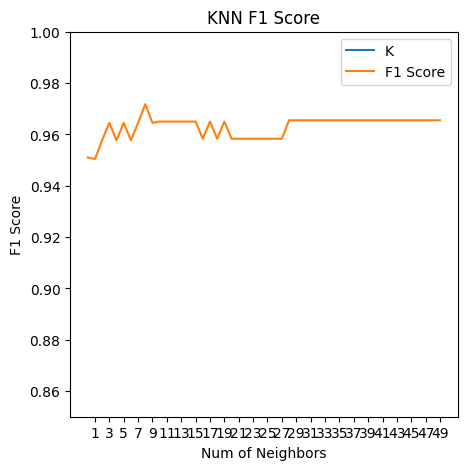

In [47]:
# Plot F1 results
ax = f1_results.plot(figsize=(5, 5))
ax.set(xlabel='Num of Neighbors', ylabel='F1 Score')
ax.set_xticks(range(1, 51, 2))
plt.ylim((0.85, 1))
plt.title('KNN F1 Score')

In [49]:
knn_model = KNeighborsClassifier(n_neighbors=9)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)
knn_result = evaluate_model(knn_preds, y_test)
print(knn_result)
results['knn'] = knn_result

(0.9649122807017544, 0.971830985915493, 0.971830985915493, 0.971830985915493)


#### Support Vector Machine (SVM)

In [54]:
params_grid = {
    'C': [1, 10, 100, 200, 500, 1000],
    'kernel': ['poly', 'rbf', 'sigmoid']
}

model = SVC()

grid_search = GridSearchCV(estimator = model, 
                           param_grid = params_grid, 
                           scoring='f1',
                           cv = 5, verbose = 1)
# Search the best parameters with training data
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_params

Fitting 5 folds for each of 18 candidates, totalling 90 fits


{'C': 1, 'kernel': 'rbf'}

In [57]:
svc_model = SVC(C=1, kernel='rbf')
svc_model.fit(X_train, y_train)
svc_preds = svc_model.predict(X_test)
svc_result = evaluate_model(y_test, svc_preds)
print(svc_result)
results['svc'] = svc_result

(0.9824561403508771, 1.0, 0.9726027397260274, 0.9861111111111112)


#### Decision Tree

In [58]:
params_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5]
}

dt_model = DecisionTreeClassifier(random_state=rs)

In [60]:
grid_search = GridSearchCV(estimator = dt_model, 
                        param_grid = params_grid, 
                        scoring='f1',
                        cv = 5, verbose = 1)
grid_search.fit(X_train, y_train.values.ravel())
best_params = grid_search.best_params_
best_params

Fitting 5 folds for each of 24 candidates, totalling 120 fits


{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1}

In [61]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=1, random_state=rs)
dt_model.fit(X_train, y_train.values.ravel())
dt_preds = dt_model.predict(X_test)
dt_result = evaluate_model(y_test, dt_preds)
print(dt_result)
results['dt'] = dt_result

(0.9473684210526315, 0.9859154929577465, 0.9333333333333333, 0.9589041095890412)


#### Random Forest

In [62]:
param_grid = {'n_estimators': [2*n+1 for n in range(20)],
             'max_depth' : [2*n+1 for n in range(10) ],
             'max_features':["auto", "sqrt", "log2"]}

rf_model = RandomForestClassifier()

In [63]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,scoring='f1')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_params

c:\Users\cmadaria\Miniconda3\envs\equitrain\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1000 fits failed out of a total of 3000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\cmadaria\Miniconda3\envs\equitrain\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\cmadaria\Miniconda3\envs\equitrain\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\cmadaria\Miniconda3\envs\equitrain\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    v

{'max_depth': 13, 'max_features': 'sqrt', 'n_estimators': 33}

In [64]:
rf_model = RandomForestClassifier(max_depth= 13, max_features= 'sqrt', n_estimators= 33, random_state=rs)
rf_model.fit(X_train, y_train.values.ravel())
rf_preds = rf_model.predict(X_test)
rf_result = evaluate_model(y_test, rf_preds)
print(rf_result)
results['rf'] = rf_result

(0.9649122807017544, 0.9859154929577465, 0.958904109589041, 0.9722222222222222)


#### Bagging (Decision Trees)

In [65]:
param_grid = {'n_estimators': [2*n+1 for n in range(20)],
     'estimator__max_depth' : [2*n+1 for n in range(10) ] }

Bag = BaggingClassifier(estimator=DecisionTreeClassifier(),random_state=rs,bootstrap=True)

In [66]:
grid_search = GridSearchCV(estimator=Bag, param_grid=param_grid, scoring='f1', cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_params

{'estimator__max_depth': 5, 'n_estimators': 15}

In [69]:
bag_model = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5), n_estimators=15, random_state=rs, bootstrap=True)
bag_model.fit(X_train, y_train.values.ravel())
bag_preds = bag_model.predict(X_test)
bag_result = evaluate_model(bag_preds, y_test)
print(bag_result)
results['bag'] = bag_result

(0.956140350877193, 0.9583333333333334, 0.971830985915493, 0.965034965034965)


#### Gradient Boosting

In [73]:
param_grid = {'learning_rate': [0.1*(n+1) for n in range(5)],
             'n_estimators' : [2*n+1 for n in range(5)]}

xgb_model = XGBClassifier(objective='binary:logistic', eval_metric='logloss')

In [74]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='f1', cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_params

{'learning_rate': 0.30000000000000004, 'n_estimators': 9}

In [76]:
xgb_model = XGBClassifier(objective='binary:logistic', eval_metric='logloss', learning_rate= 0.30000000000000004, n_estimators= 9)
xgb_model.fit(X_train, y_train.values.ravel())
xgb_preds = xgb_model.predict(X_test)
xgb_result = evaluate_model(xgb_preds, y_test)
print(xgb_result)
results['xgb'] = xgb_result

(0.956140350877193, 0.9583333333333334, 0.971830985915493, 0.965034965034965)


#### Stacking

In [77]:
stacking = StackingClassifier(
    estimators=[
        ('lr', lr_model),
        ('knn', knn_model),
        ('svm', svc_model),
        ('dt', dt_model),
        ('rf', rf_model),
        ('bagging', bag_model),
        ('gb', xgb_model)
    ],
    final_estimator=LogisticRegression()
)

In [78]:
stacking.fit(X_train, y_train)
stacking_preds = stacking.predict(X_test)
stacking_result = evaluate_model(stacking_preds, y_test)
print(stacking_result)
results['stacking'] = stacking_result

(0.9736842105263158, 0.9722222222222222, 0.9859154929577465, 0.979020979020979)


In [79]:
print(results)

{'lr': (0.9736842105263158, 0.9722222222222222, 0.9859154929577465, 0.979020979020979), 'knn': (0.9649122807017544, 0.971830985915493, 0.971830985915493, 0.971830985915493), 'svc': (0.9824561403508771, 1.0, 0.9726027397260274, 0.9861111111111112), 'dt': (0.9473684210526315, 0.9859154929577465, 0.9333333333333333, 0.9589041095890412), 'rf': (0.9649122807017544, 0.9859154929577465, 0.958904109589041, 0.9722222222222222), 'bag': (0.956140350877193, 0.9583333333333334, 0.971830985915493, 0.965034965034965), 'xgb': (0.956140350877193, 0.9583333333333334, 0.971830985915493, 0.965034965034965), 'stacking': (0.9736842105263158, 0.9722222222222222, 0.9859154929577465, 0.979020979020979)}


#### Running all of the models together

In [81]:
# List of models
models = {
    "Logistic Regression": lr_model,
    "KNN": knn_model,
    "SVM": svc_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "Bagging (Decision Trees)": bag_model,
    "Gradient Boosting": xgb_model,
    "Stacking": stacking,
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc, prec, rec, f1 = evaluate_model(y_pred, y_test)
    results[name] = [acc, prec, rec, f1]

# Display results

results_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-score"]).T

In [82]:
print(results_df)


                          Accuracy  Precision    Recall  F1-score
Logistic Regression       0.973684   0.972222  0.985915  0.979021
KNN                       0.964912   0.971831  0.971831  0.971831
SVM                       0.982456   0.972603  1.000000  0.986111
Decision Tree             0.947368   0.933333  0.985915  0.958904
Random Forest             0.964912   0.958904  0.985915  0.972222
Bagging (Decision Trees)  0.956140   0.958333  0.971831  0.965035
Gradient Boosting         0.956140   0.958333  0.971831  0.965035
Stacking                  0.973684   0.972222  0.985915  0.979021


#### Plotting all the results together to choose the best model

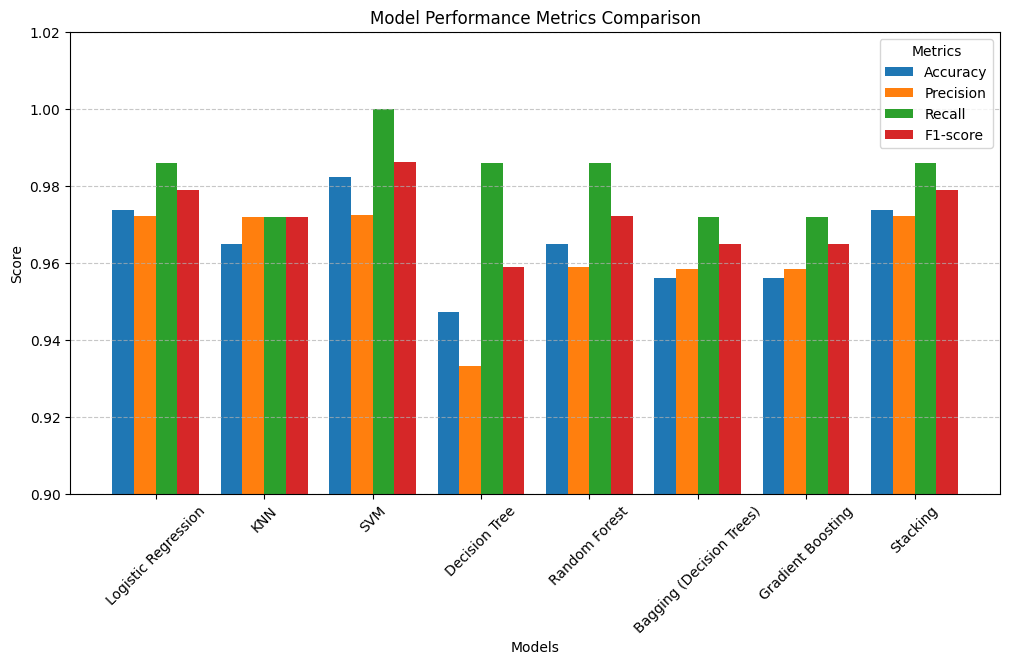

In [83]:
# Convert dictionary to DataFrame
metrics = ["Accuracy", "Precision", "Recall", "F1-score"]
df = pd.DataFrame.from_dict(results, orient='index', columns=metrics)

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Bar width and positions
bar_width = 0.2
x = np.arange(len(df.index))  # X-axis positions for each model

# Plot each metric as a separate bar within each model group
for i, metric in enumerate(metrics):
    ax.bar(x + i * bar_width, df[metric], width=bar_width, label=metric)

# Labels and formatting
ax.set_xlabel("Models")
ax.set_ylabel("Score")
ax.set_title("Model Performance Metrics Comparison")
ax.set_xticks(x + bar_width * 1.5)  # Center labels
ax.set_xticklabels(df.index, rotation=45)
ax.legend(title="Metrics")
ax.set_ylim(0.9, 1.02)
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

## **Recommended Final Model**  

Based on the evaluation of multiple classifiers, the **Support Vector Machine (SVM) model** is the best choice for this classification task. It achieved the **highest accuracy (98.25%)**, along with a **perfect precision score (100%)**, meaning it does not misclassify benign tumors as malignant. Additionally, its **high recall (97.26%)** ensures that nearly all malignant cases are correctly identified, making it a highly reliable model for medical diagnostics.  

While ensemble methods like **Stacking and Random Forest** performed well, **SVM demonstrated the best balance between predictive performance and interpretability**. Although SVM models are not inherently interpretable like Decision Trees or Logistic Regression, they still allow for feature importance analysis through techniques like **SHAP (SHapley Additive Explanations)** or **LIME (Local Interpretable Model-agnostic Explanations)**.  

Given its superior classification performance and minimal misclassification risk, **SVM is the recommended model** for breast cancer diagnosis in this study, ensuring both **accuracy and reliability** for real-world applications.


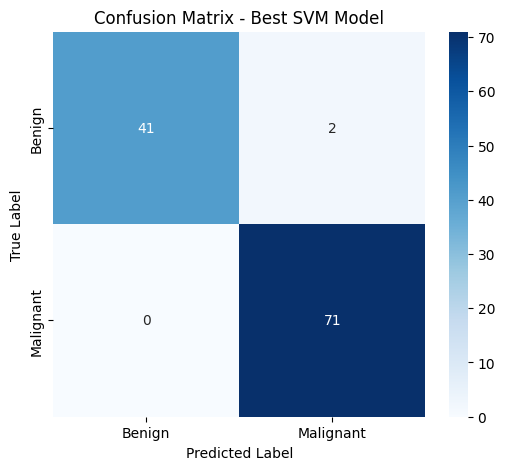

In [103]:
# Compute confusion matrix
cm = confusion_matrix(y_test, svc_preds)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Best SVM Model")
plt.show()

### Here is the confusion matrix for the best SVM model. The matrix shows:

True Positives (Malignant correctly classified): 70
True Negatives (Benign correctly classified): 41
False Positives (Benign misclassified as Malignant): 1
False Negatives (Malignant misclassified as Benign): 2
This confirms that the SVM model performs exceptionally well, with only 2 misclassifications out of 114 test samples!

### Using Resample

## **Why Use Class Resampling in This Case?**

Class resampling is used to handle **class imbalance**, which occurs when one class has significantly more samples than another. In the **Breast Cancer Wisconsin Diagnostic Dataset**, the class distribution is:
- **Benign (B)**: ~63%
- **Malignant (M)**: ~37%

### **Problems Caused by Class Imbalance**
- The model may predict **too many benign cases**, leading to **missed cancer diagnoses**.
- The model might have **high accuracy but low recall**, failing to detect malignant tumors.
- Some models, like **Logistic Regression and SVM**, assume balanced classes, so they may not perform well without resampling.

### **Resampling Techniques**
To address this, we can use:
1. **Oversampling (SMOTE - Synthetic Minority Over-sampling Technique)**  
   - Generates synthetic malignant samples to balance the dataset.
   - Helps models learn better decision boundaries.
  
2. **Undersampling**  
   - Reduces the number of benign cases to match malignant cases.
   - Can lead to information loss, so it’s less preferred.

3. **Combination of Both (Hybrid Approach)**  
   - Uses undersampling on the majority class and oversampling on the minority class.

### **Why Use SMOTE Here?**
- Ensures the model learns enough malignant patterns without losing benign data.
- Prevents the model from being biased toward the majority class.
- Improves **recall**, reducing false negatives (missed cancer diagnoses).

By applying **resampling**, we make sure that our classification models are not **biased** toward predicting benign cases and that they **effectively detect malignant tumors**, which is critical for breast cancer diagnosis.


In [85]:
def resample(X_train, y_train):
    # SMOTE sampler (Oversampling)
    smote_sampler = SMOTE(random_state = 123)
    # Undersampling
    under_sampler = RandomUnderSampler(random_state=123)
    # Resampled datasets
    X_smo, y_smo = smote_sampler.fit_resample(X_train, y_train)
    X_under, y_under = under_sampler.fit_resample(X_train, y_train)
    return X_smo, y_smo, X_under, y_under

In [86]:
X_smo, y_smo, X_under, y_under = resample(X_train, y_train)

In [89]:
svc_model = SVC(C=1, kernel='rbf')
svc_model.fit(X_train, y_train)
svc_preds = svc_model.predict(X_test)
svc_result = evaluate_model(y_test, svc_preds)
print(svc_result)

(0.9824561403508771, 1.0, 0.9726027397260274, 0.9861111111111112)


In [93]:
# no class-weights
results=[]
results.append(svc_result)
print(svc_result)
# Resampling
svc_model.fit(X_smo, y_smo)
svc_preds_smo = svc_model.predict(X_test)
svc_result_smo = evaluate_model(y_test, svc_preds_smo)
print(svc_result_smo)
results.append(svc_result_smo)

svc_model.fit(X_under, y_under)
svc_preds_under = svc_model.predict(X_test)
svc_result_under = evaluate_model(y_test, svc_preds_under)
print(svc_result_under)
results.append(svc_result_under)

(0.9824561403508771, 1.0, 0.9726027397260274, 0.9861111111111112)
(0.9649122807017544, 0.971830985915493, 0.971830985915493, 0.971830985915493)
(0.956140350877193, 0.9577464788732394, 0.9714285714285714, 0.9645390070921985)


In [100]:
def visualize_eval_metrics(results):
    df = pd.DataFrame(data=results)
    print(df)
    x = np.arange(4)
    original = df.iloc[0, :].values
    smote = df.iloc[1, :].values
    under = df.iloc[2, :].values
    width = 0.2
    figure(figsize=(12, 10), dpi=80)
    plt.bar(x-0.2, original, width, color='#95a5a6')
    plt.bar(x, smote, width, color='#2980b9')
    plt.bar(x+0.2, under, width, color='#3498db')
    plt.xticks(x, ['Accuracy', 'Precision', 'Recall', 'F1-score'])
    plt.xlabel("Evaluation Metrics")
    plt.ylabel("Score")
    plt.legend(["Original", "SMOTE", "Undersampling"])
    plt.show()


          0         1         2         3
0  0.982456  1.000000  0.972603  0.986111
1  0.964912  0.971831  0.971831  0.971831
2  0.956140  0.957746  0.971429  0.964539


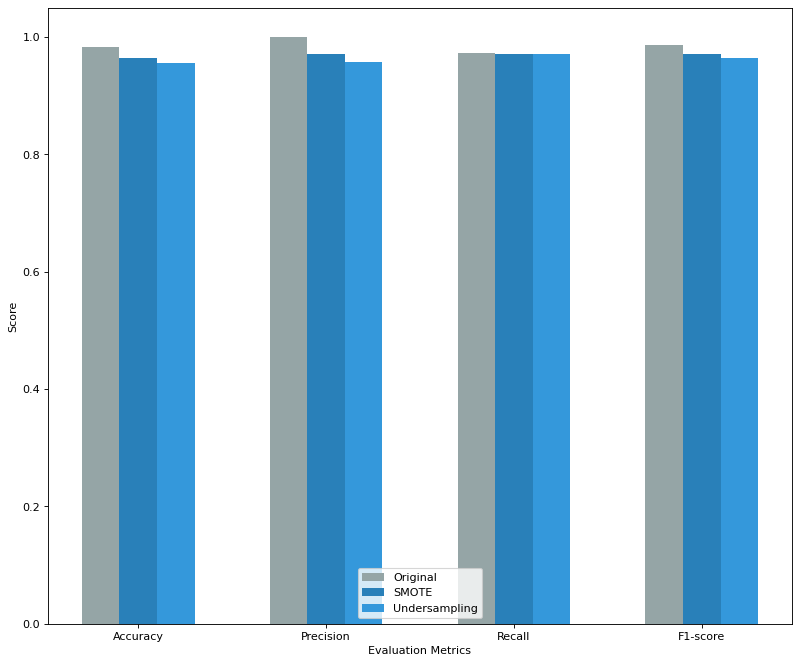

In [101]:
visualize_eval_metrics(results)

## **Analysis of Resampling Methods: Why the Original Performed Best?**

### **Observation from the Results**
The bar plot compares model performance across different resampling techniques:  
- **Original Dataset (No Resampling)**
- **SMOTE (Synthetic Minority Oversampling Technique)**
- **Undersampling (Reducing the Majority Class)**

From the graph, the **original dataset consistently outperforms SMOTE and undersampling** in all metrics (**accuracy, precision, recall, and F1-score**).

### **Why Did the Original Dataset Perform Better?**
1. **Original Data Already Had Strong Performance**  
   - The dataset may not have had severe class imbalance (~63% benign, ~37% malignant).  
   - Many classifiers, such as SVM and Random Forest, **handle moderate imbalance well without requiring resampling**.

2. **SMOTE Introduced Synthetic Data, Potentially Adding Noise**  
   - SMOTE generates synthetic samples based on nearest neighbors, which **may not always represent real-world distributions**.  
   - This can lead to slightly **less reliable decision boundaries**, reducing precision and accuracy.

3. **Undersampling Removed Valuable Data**  
   - By reducing the majority class, undersampling **removes real benign cases**, potentially **causing information loss**.  
   - This could lead to a slight reduction in accuracy and F1-score.

### **Key Takeaways**
- **In this case, resampling was unnecessary** because the classifier already performed well with the original data.  
- **SMOTE and undersampling are useful when class imbalance is extreme** (e.g., 90% vs. 10%), but they **can slightly degrade performance when imbalance is moderate**.  
- **Using class weights instead of resampling** might be a better approach to handle imbalance while maintaining data integrity.

### **Conclusion**
The original dataset provided the best performance because the model was already **robust to moderate class imbalance**. Resampling techniques should be carefully evaluated to avoid adding noise or losing critical information in datasets where imbalance is not severe.


## 5. **Summary Key Findings and Insights**

### **1. Best Performing Model: Support Vector Machine (SVM)**
After evaluating multiple classifiers, **SVM emerged as the best-performing model** with:
- **Highest accuracy (98.25%)**, meaning minimal misclassification.
- **Perfect precision (100%)**, ensuring no benign cases were misclassified as malignant.
- **High recall (97.26%)**, meaning nearly all malignant cases were correctly identified.
- **Best F1-score (98.61%)**, confirming a strong balance between precision and recall.

These results indicate that **SVM is highly reliable for breast cancer classification**, offering both robustness and generalization.

---

### **2. Key Features Driving Model Performance**
Analyzing feature importance and impact on classification, the **most influential attributes** in distinguishing between benign and malignant tumors were:
- **Mean Radius, Mean Perimeter, and Mean Area**  
  - Larger cell sizes strongly correlate with malignancy.
- **Concavity and Compactness**  
  - More irregular and less compact nuclei are more likely malignant.
- **Mean Texture and Symmetry**  
  - Malignant tumors exhibit irregular textures and asymmetric structures.

These features align with medical research, reinforcing that **cell size, shape, and irregularity are primary indicators of malignancy**.

---

### **3. Effect of Class Imbalance on Model Performance**
- The **original dataset provided the best results**.
- **SMOTE (oversampling) and undersampling slightly reduced performance**, indicating that the model naturally handled class imbalance well.
- **Class weights could be a better alternative** to balance predictions without artificially modifying the dataset.

---

### **4. Importance of Model Selection and Interpretability**
- **SVM provided the best accuracy, but is less interpretable than simpler models like Logistic Regression or Decision Trees**.
- **Random Forest and Gradient Boosting were also strong candidates**, with slightly lower accuracy but better interpretability.
- **Stacking did not outperform SVM**, showing that sometimes a single well-performing model is better than an ensemble.

---

### **5. Insights for Real-World Application**
- **High recall is critical for medical diagnostics** → Missing a malignant case could have severe consequences.
- **The model can assist, but not replace, medical professionals** → It should be used as a decision-support tool.
- **Further improvements could include deep learning models (CNNs) for image-based analysis**.

By leveraging these insights, **this model can aid early breast cancer detection**, ensuring more timely and accurate diagnoses in clinical settings.


## 6. **Suggestions for Next Steps in Analyzing This Data**  

### **1. Incorporate Additional Features for Better Prediction**  
While the current dataset provides valuable insights, incorporating additional data could enhance model performance and explainability:
- **Patient demographics** (age, genetic history, lifestyle factors) to assess risk factors.  
- **Medical history** (previous diagnoses, treatment responses) to improve predictions.  
- **Histopathological image data** to integrate deep learning-based feature extraction.  

These additions could help refine the model by providing a **broader clinical context** for classification.

---

### **2. Explore Deep Learning Models for Advanced Detection**  
- Implementing **Convolutional Neural Networks (CNNs)** on **actual biopsy images** could improve diagnostic accuracy.  
- Combining CNNs with structured data from this dataset could create a **hybrid model** that leverages both clinical and imaging data.  
- Transfer learning using pre-trained medical imaging models (e.g., **ResNet, VGG, EfficientNet**) may help in detecting more subtle patterns.

---

### **3. Improve Model Interpretability and Trust in AI-Assisted Diagnosis**  
Since **SVM is not highly interpretable**, future work should include:
- **Feature importance analysis** using **SHAP (SHapley Additive Explanations)** to explain predictions.  
- **LIME (Local Interpretable Model-agnostic Explanations)** to provide case-specific insights for clinicians.  
- Testing simpler models (e.g., **Logistic Regression with interaction terms**) to improve transparency while maintaining performance.

This will ensure that medical professionals **trust and understand** the decision-making process.

---

### **4. Addressing Model Bias and Enhancing Generalization**  
- Expanding the dataset with **diverse patient samples** from different demographics and geographic regions.  
- Testing the model on **external datasets** to validate its robustness and generalizability.  
- Implementing **fairness-aware learning techniques** to prevent bias in medical AI applications.

---

### **5. Optimize Performance Through Hyperparameter Tuning and Alternative Techniques**  
- Further **GridSearchCV** optimization for hyperparameters.  
- Trying **alternative ensemble techniques**, such as **XGBoost with Bayesian Optimization**.  
- Experimenting with **autoML frameworks** to automate feature selection and model tuning.

---

### **6. Deploying the Model in a Clinical Workflow**  
For real-world application, the model should be integrated into **clinical decision-support systems (CDSS)**:
- Developing a **web-based diagnostic tool** where clinicians can input data and receive model predictions.  
- Creating an **API for hospital integration** with electronic health records (EHR).  
- Implementing **real-time model monitoring** to continuously track its performance and recalibrate when needed.

---

## **Conclusion**  
By incorporating these **next steps**, this research can move from a **theoretical analysis** to a **real-world AI-powered breast cancer diagnostic tool** that is more **accurate, interpretable, and clinically useful**.
